In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

In [3]:
#loading the dataset and displaying the first 10 rows
dataset = pd.read_csv('/content/drive/MyDrive/data/World Happiness Report.csv')
dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
#Identifying the rows and columns in the dataset
rows, column = dataset.shape
print("Number of rows:", rows)
print("Number of columns:", column)

Number of rows: 143
Number of columns: 9


In [5]:
#List all the columns and their datatypes
dataset.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [6]:
#Calculating the mean, median and standard deviation for the score column
mean_score = dataset['score'].mean()
median_score = dataset['score'].median()
std_score = dataset['score'].std()
print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Standard Deviation of Score:", std_score)

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [7]:
#Identifying the country with the highest and lowest happiness score
max_score_country = dataset.loc[dataset['score'].idxmax()]['Country name']
min_score_country = dataset.loc[dataset['score'].idxmin()]['Country name']
print("Country with Highest happiness Score:", max_score_country)
print("Country with Lowest happiness Score:", min_score_country)

Country with Highest happiness Score: Finland
Country with Lowest happiness Score: Afghanistan


In [8]:
#Checking the missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [9]:
#Filtering the dataset, only the countries with a score greater than 7.5
filtered_dataset = dataset[dataset['score'] > 7.5]

#Sorting the dataset by GDP per Capita in descending order and display the top 10 rows
sorted_dataset = filtered_dataset.sort_values(by='Log GDP per capita', ascending=False)
top_10_countries = sorted_dataset.head(10)
print("\n")
print("Top 10 Countries with Score > 7.5:")
print(top_10_countries)



Top 10 Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [10]:
dataset['Happiness Category']= np.where(dataset['score'] < 4, 'Low', np.where(dataset['score'] <= 6, 'Medium', 'High'))

# Display the updated DataFrame
updated_dataset = (dataset[['Country name', 'score', 'Happiness Category']])
updated_dataset.head(143)

,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


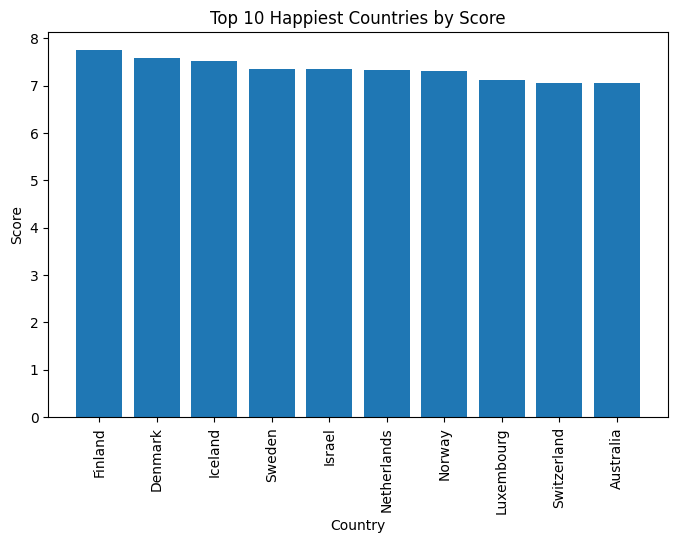

In [11]:
# Sort the dataset by 'Score' in descending order and select the top 10 happiest countries
top_10_happiest = dataset.nlargest(10, 'score')

# Plotting the bar plot
plt.figure(figsize=(8, 5))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Happiest Countries by Score')
plt.xticks(rotation=90)
plt.show()

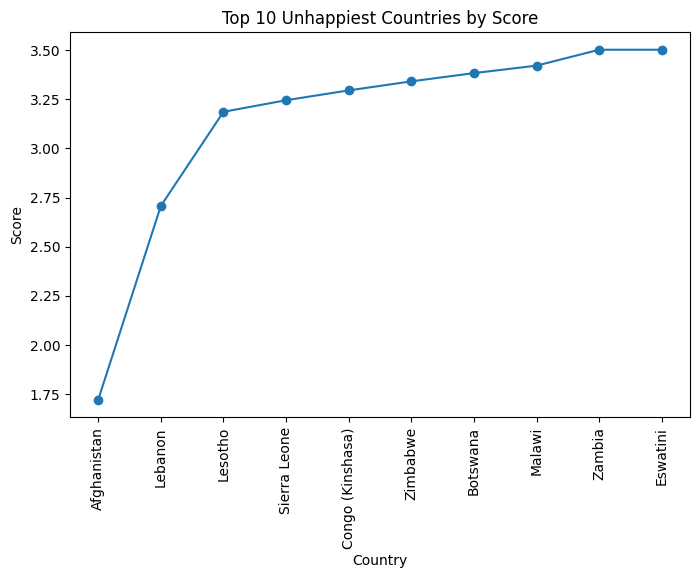

In [12]:
# Sort the dataset by 'Score' in ascending order and select the top 10 unhappiest countries
top_10_unhappiest = dataset.nsmallest(10, 'score')

# Plotting the line plot
plt.figure(figsize=(8, 5))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=90)
plt.show()

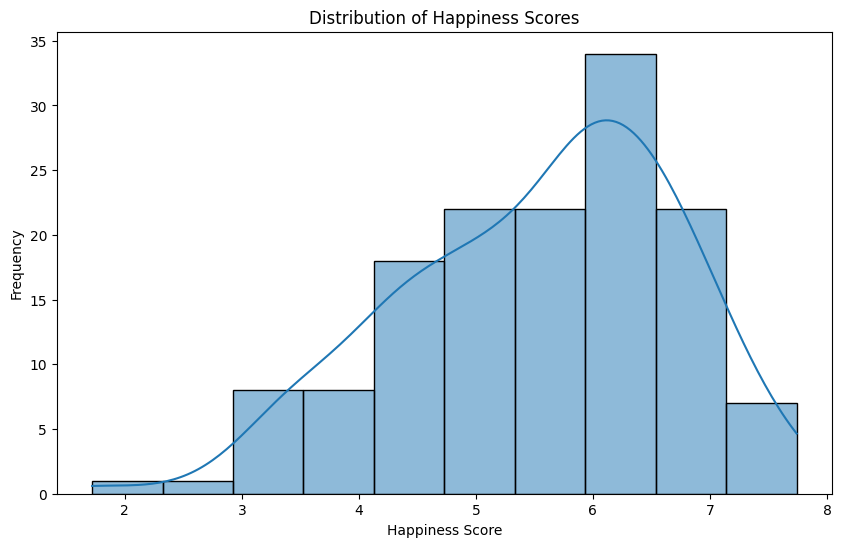

In [13]:
#Plot a histogram for the Score column to show its distribution and also interpret.
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['score'], bins=10, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

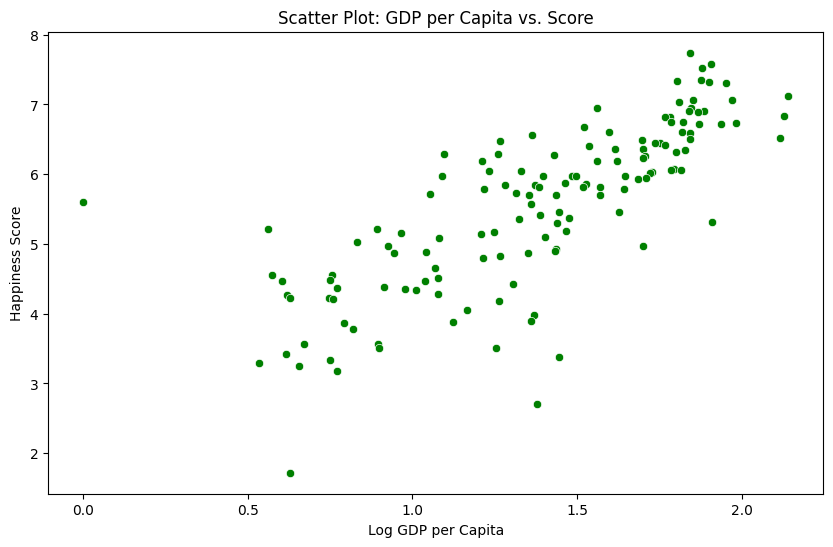

In [14]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=dataset, color = 'Green')
plt.title('Scatter Plot: GDP per Capita vs. Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

In [15]:
# Define the countries in South Asia
SouthAsia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the dataset to include only the countries in South Asia
filtered_dataset = dataset[dataset['Country name'].isin(SouthAsia)]

# Save the filtered dataset as a separate CSV file
filtered_dataset.to_csv('south_asia_dataset.csv', index=False)

# Display the filtered dataset
filtered_dataset

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [16]:
dataset = filtered_dataset
#Create the Dataframe
SouthAsia = pd.DataFrame(dataset)

#Calculate the Composite Score
SouthAsia['Composite Score'] = 0.40 * SouthAsia['Log GDP per capita'] + 0.30 * SouthAsia['Social support'] + 0.30 * SouthAsia['Healthy life expectancy']

#Rank the South Asian countries based on the Composite Score
SouthAsia = SouthAsia.sort_values(by='Composite Score', ascending=False)
SouthAsia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


<ipython-input-17-c3f0a48f8b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='viridis')


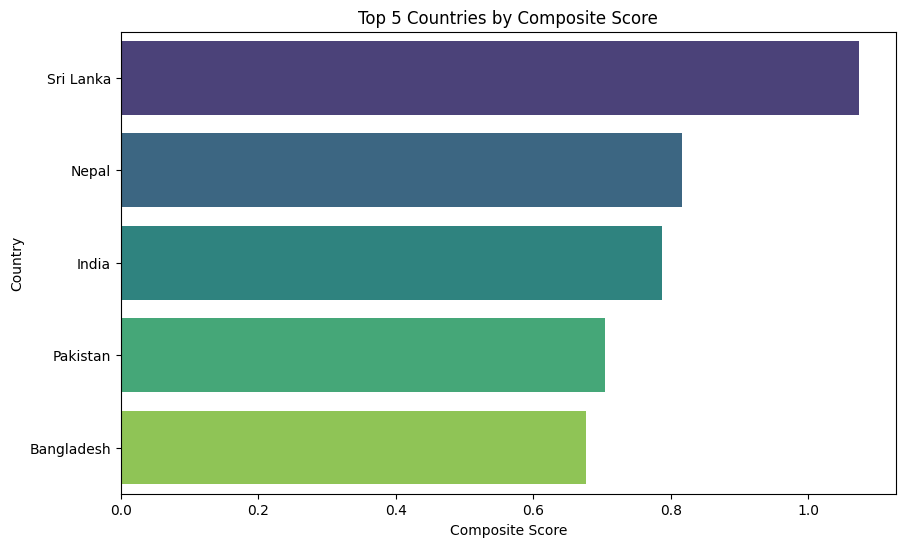

In [17]:
#Horizontal bar chart of the top 5 countries showing the Composite Score
plt.figure(figsize=(10, 6))
top_5_countries= SouthAsia.head(5)
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='viridis')
plt.title('Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

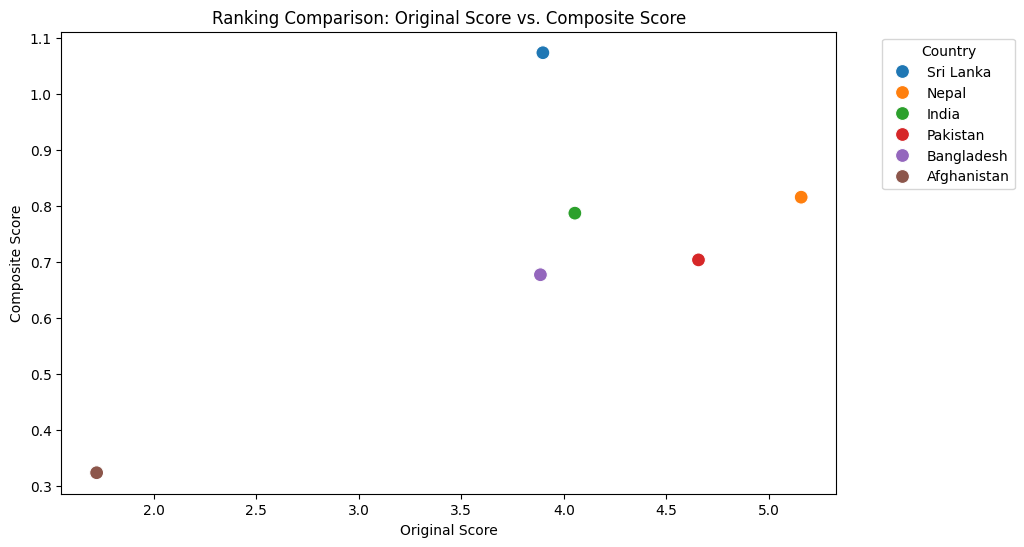

Review the rankings:
     Country name  score  Composite Score
127    Sri Lanka  3.898           1.0739
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


In [18]:
#Compare rankings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=SouthAsia, hue = 'Country name' , palette = 'tab10', s=100)
plt.title('Ranking Comparison: Original Score vs. Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#Discussion
alignment = SouthAsia[['Country name', 'score', 'Composite Score']]
print("Review the rankings:\n", alignment)

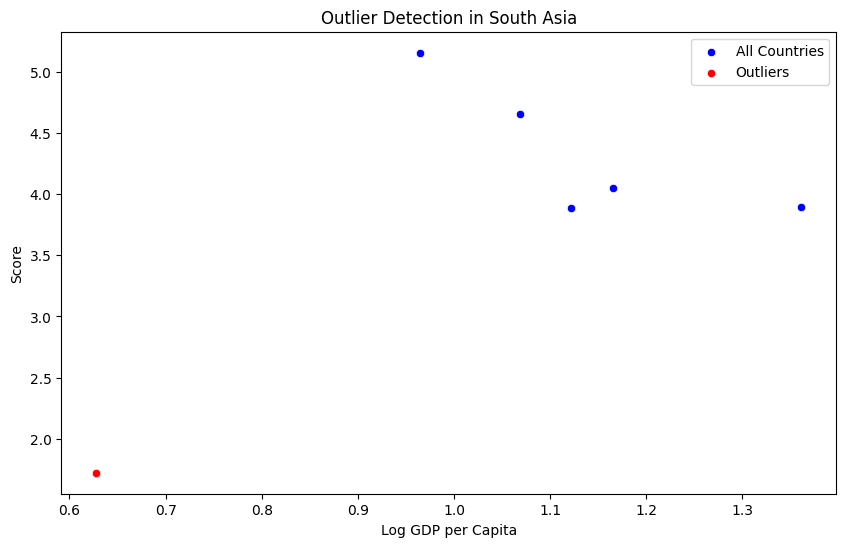

Outlier Countries:


,Country name,Log GDP per capita,score
5,Afghanistan,0.628,1.721


In [19]:
# Outlier countries in South Asia based on their Score and GDP per Capita

SouthAsia = pd.read_csv('south_asia_dataset.csv')

#Claculate the IQR for 'score' and 'GDP per Capita'
score_IQR = SouthAsia['score'].quantile(0.75) - SouthAsia['score'].quantile(0.25)
gdp_IQR = SouthAsia['Log GDP per capita'].quantile(0.75) - SouthAsia['Log GDP per capita'].quantile(0.25)

# Calculate the lower and upper bounds for both 'score' and 'GDP per Capita' using the 1.5 * IQR rule
score_lower_bound = SouthAsia['score'].quantile(0.25) - 1.5 * score_IQR
score_upper_bound = SouthAsia['score'].quantile(0.75) + 1.5 * score_IQR

gdp_lower_bound = SouthAsia['Log GDP per capita'].quantile(0.25) - 1.5 * gdp_IQR
gdp_upper_bound = SouthAsia['Log GDP per capita'].quantile(0.75) + 1.5 * gdp_IQR

#Identify outliers based on the bounds
outliers = SouthAsia[(SouthAsia['score'] < score_lower_bound) |
                     (SouthAsia['score'] > score_upper_bound) |
                     (SouthAsia['Log GDP per capita'] < gdp_lower_bound) |
                     (SouthAsia['Log GDP per capita'] > gdp_upper_bound)
                     ]
# Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=SouthAsia, color='blue', label='All Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outlier Detection in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')


plt.legend()
plt.show()

# Step 4: Discuss characteristics of outliers and their potential impact
print("Outlier Countries:")
outlier_countries = (outliers[['Country name', 'Log GDP per capita', 'score']])
outlier_countries

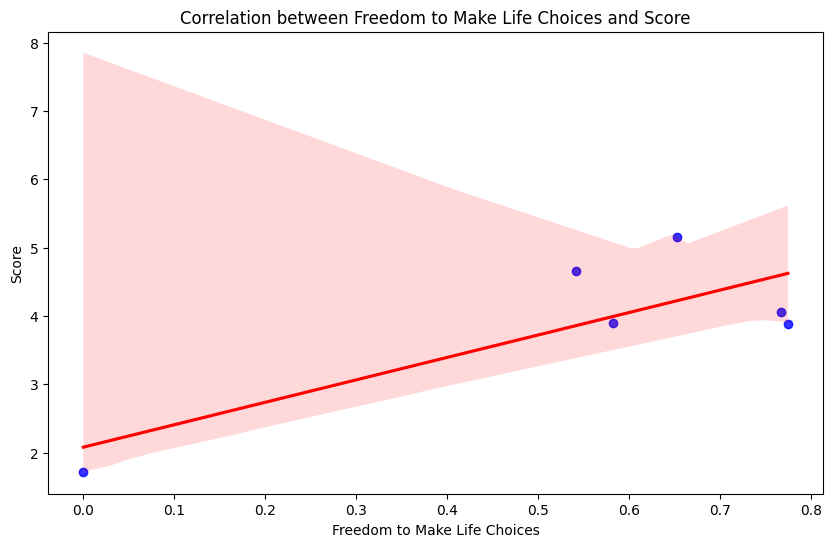

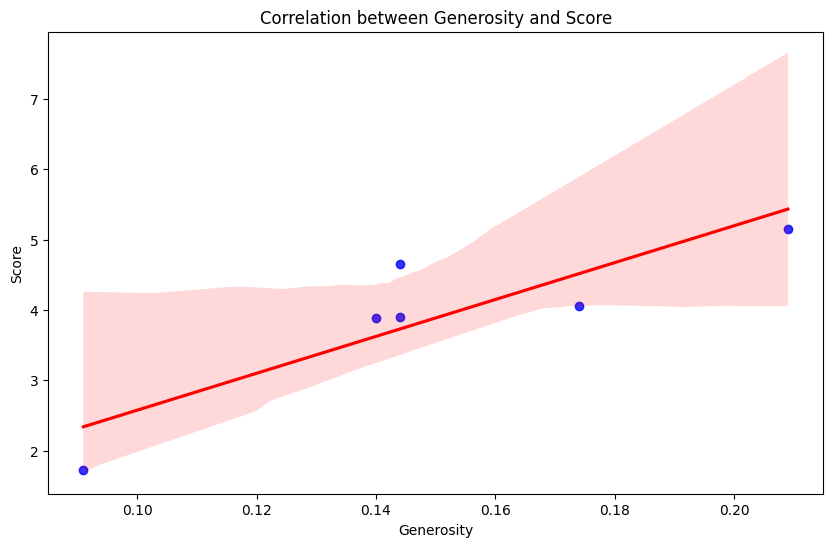

The strongest relationship is with Generosity: 0.874512371253192
The relation between Freedom to make Life chocies and score is moderate :: 0.8005185224163315
The relation between Generosity and score is moderate :: 0.874512371253192


In [20]:
# Calculate correlation with the score for South Asian countries
correlation_freedom = SouthAsia['score'].corr(SouthAsia['Freedom to make life choices'])
correlation_generosity = SouthAsia['score'].corr(SouthAsia['Generosity'])


#Scatter plots with trendlines for these metrices agianst the score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=SouthAsia, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Freedom to Make Life Choices and Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=SouthAsia, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Generosity and Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

# Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

if abs(correlation_freedom) > abs(correlation_generosity):
    print("The strongest relationship is with Freedom to Make Life Choices:", correlation_freedom)
else:
    print("The strongest relationship is with Generosity:", correlation_generosity)

if correlation_freedom < 0.5:
    print("The relation between Freedom to make Life chocies and score is strong :", correlation_freedom)

elif correlation_freedom > 0.2:
    print("The relation between Freedom to make Life chocies and score is moderate ::", correlation_freedom)

else:
    print("The relation between Freedom to make Life chocies and score is weak ::", correlation_freedom)

if correlation_generosity< 0.5:
    print("The relation between Generosity and score is strong :", correlation_generosity)

elif correlation_generosity > 0.2:
    print("The relation between Generosity and score is moderate ::", correlation_generosity)

else:
    print("The relation between Generosity and score is weak ::", correlation_generosity)





Explanation:

We know according to the of the characters in the above plot that the pearsons by of Free to make life choices and score was high which show a very good fit. Nevertheless, the degree with generosity integrating with score was relatively less and this is indicate that the importance of this metric is less for identify happy score in south Asian countries.

In [21]:
# Adding new column called (GDP - Score)
SouthAsia['GDP-Score Gap'] = SouthAsia['Log GDP per capita'] - SouthAsia['score']

#2 Rank the countries by GDP - Score  Gap
#Sorting in ascending order
SouthAsia_asc = SouthAsia.sort_values(by = 'GDP-Score Gap', ascending = True)
Result_asc = SouthAsia_asc[['Country name', 'GDP-Score Gap']]
Result_asc

,Country name,GDP-Score Gap
0,Nepal,-4.193
1,Pakistan,-3.588
2,India,-2.888
4,Bangladesh,-2.764
3,Sri Lanka,-2.537
5,Afghanistan,-1.093


In [22]:
#Sorting in descending order
SouthAsia_asc = SouthAsia.sort_values(by = 'GDP-Score Gap', ascending = False)
Result_dsc = SouthAsia_asc[['Country name', 'GDP-Score Gap']]
Result_dsc

,Country name,GDP-Score Gap
5,Afghanistan,-1.093
3,Sri Lanka,-2.537
4,Bangladesh,-2.764
2,India,-2.888
1,Pakistan,-3.588
0,Nepal,-4.193


<ipython-input-23-dc37f1244815>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=highlighted_gaps, palette=['green']*3 + ['red']*3)


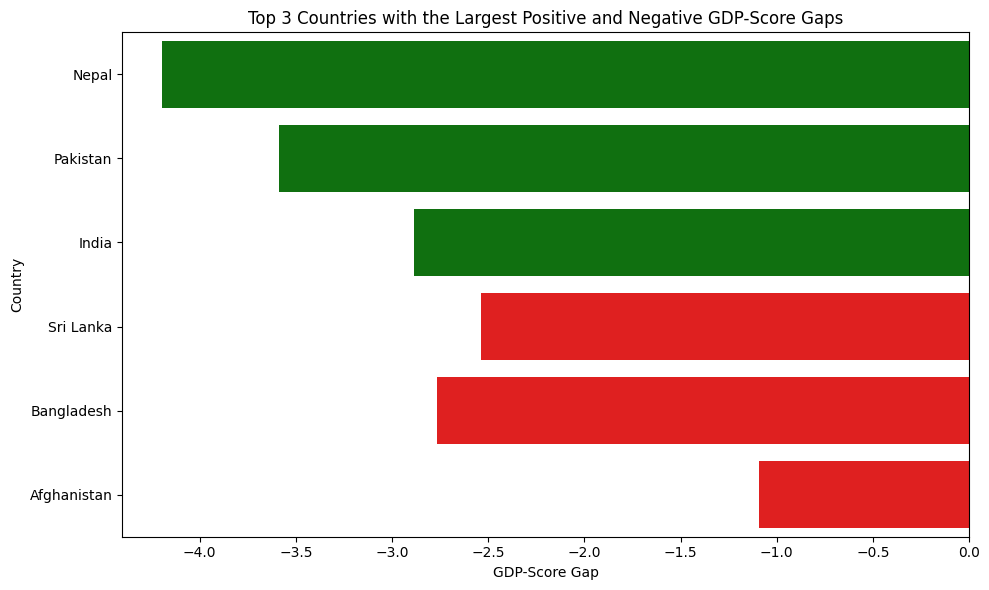

In [23]:
# Get the top 3 positive and negative GDP-Score gaps
top_3_positive = SouthAsia.head(3)
top_3_negative = SouthAsia.tail(3)

# Combine the data for plotting
highlighted_gaps = pd.concat([top_3_positive, top_3_negative])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=highlighted_gaps, palette=['green']*3 + ['red']*3)
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [24]:
#Analyze the reasons behind these gaps and their implications for South Asian countries.

print("\n Top three countries with Largets Positive GDP - Score Gaps:")
print(top_3_positive[['Country name', 'GDP-Score Gap']])

print("\n Top three countries with Largets Negative GDP - Score Gaps:")
print(top_3_negative[['Country name', 'GDP-Score Gap']])

#Discuss the possible reasons for these gaps:
print('\n Analysis of gaps:')
for idx, row in top_3_positive.iterrows():
  print(f"\nCountry: {row['Country name']}")
  print(f"GDP per Capita: {row['Log GDP per capita']}, score: {row['score']}")
  print(f"GDP-Score Gap: {row['GDP-Score Gap']}")
  print("Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, "
          "indicating that factors such as income inequality, social support, or life expectancy may not "
          "be as favorable despite higher economic output.")

for idx, row in top_3_negative.iterrows():
  print(f"\nCountry: {row['Country name']}")
  print(f"GDP per Capita: {row['Log GDP per capita']}, score: {row['score']}")
  print(f"GDP-Score Gap: {row['GDP-Score Gap']}")
  print("Possible reason for gap: The country's GDP per Capita is significantly lower than its Composite Score, "
          "indicating that factors such as better social support, healthcare, or life expectancy might be "
          "compensating for the lower income levels.")




 Top three countries with Largets Positive GDP - Score Gaps:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888

 Top three countries with Largets Negative GDP - Score Gaps:
  Country name  GDP-Score Gap
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
5  Afghanistan         -1.093

 Analysis of gaps:

Country: Nepal
GDP per Capita: 0.965, score: 5.158
GDP-Score Gap: -4.1930000000000005
Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, indicating that factors such as income inequality, social support, or life expectancy may not be as favorable despite higher economic output.

Country: Pakistan
GDP per Capita: 1.069, score: 4.657
GDP-Score Gap: -3.588
Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, indicating that factors such as income inequality, social support, or life expectancy may not be as favorable despite hi

# **3.3 Problem - 3 - Comparative Analysis:**

In [25]:

dataset = pd.read_csv('/content/drive/MyDrive/data/World Happiness Report.csv')
SouthAsia = pd.read_csv('south_asia_dataset.csv')
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
filtered_dataset = dataset[dataset['Country name'].isin(middle_east_countries)]

# Save the filtered dataset as a separate CSV file
filtered_dataset.to_csv('MiddleEast.csv')
MiddleEast = pd.DataFrame(filtered_dataset)
# Display the filtered dataset
MiddleEast

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [26]:
SouthAsia = pd.read_csv('south_asia_dataset.csv')
MiddleEast = pd.read_csv('MiddleEast.csv')
#Calculate the mean, Standard deviation
mean_score_south_asia = SouthAsia['score'].mean()
mean_score_middle_eastern = MiddleEast['score'].mean()
std_score_south_asia = SouthAsia['score'].std()
std_score_middle_eastern = MiddleEast['score'].std()
print(f"Mean Score (South Asia):{mean_score_south_asia:.2f}")
print(f"Mean Score (Middle East):{mean_score_middle_eastern:2f}")
print(f"\nStandard Deviation (South Asia): {std_score_south_asia:.2f}")
print(f"Standard Deviation (Middle East): {std_score_middle_eastern:.2f}")

#Comparing the average scores
if mean_score_south_asia > mean_score_middle_eastern:
    print("\nSouth Asia has higher happiness Scores on average.")
else:
    print("\nMiddle East has higher happiness Scores on average.")




Mean Score (South Asia):3.90
Mean Score (Middle East):5.412100

Standard Deviation (South Asia): 1.18
Standard Deviation (Middle East): 1.57

Middle East has higher happiness Scores on average.


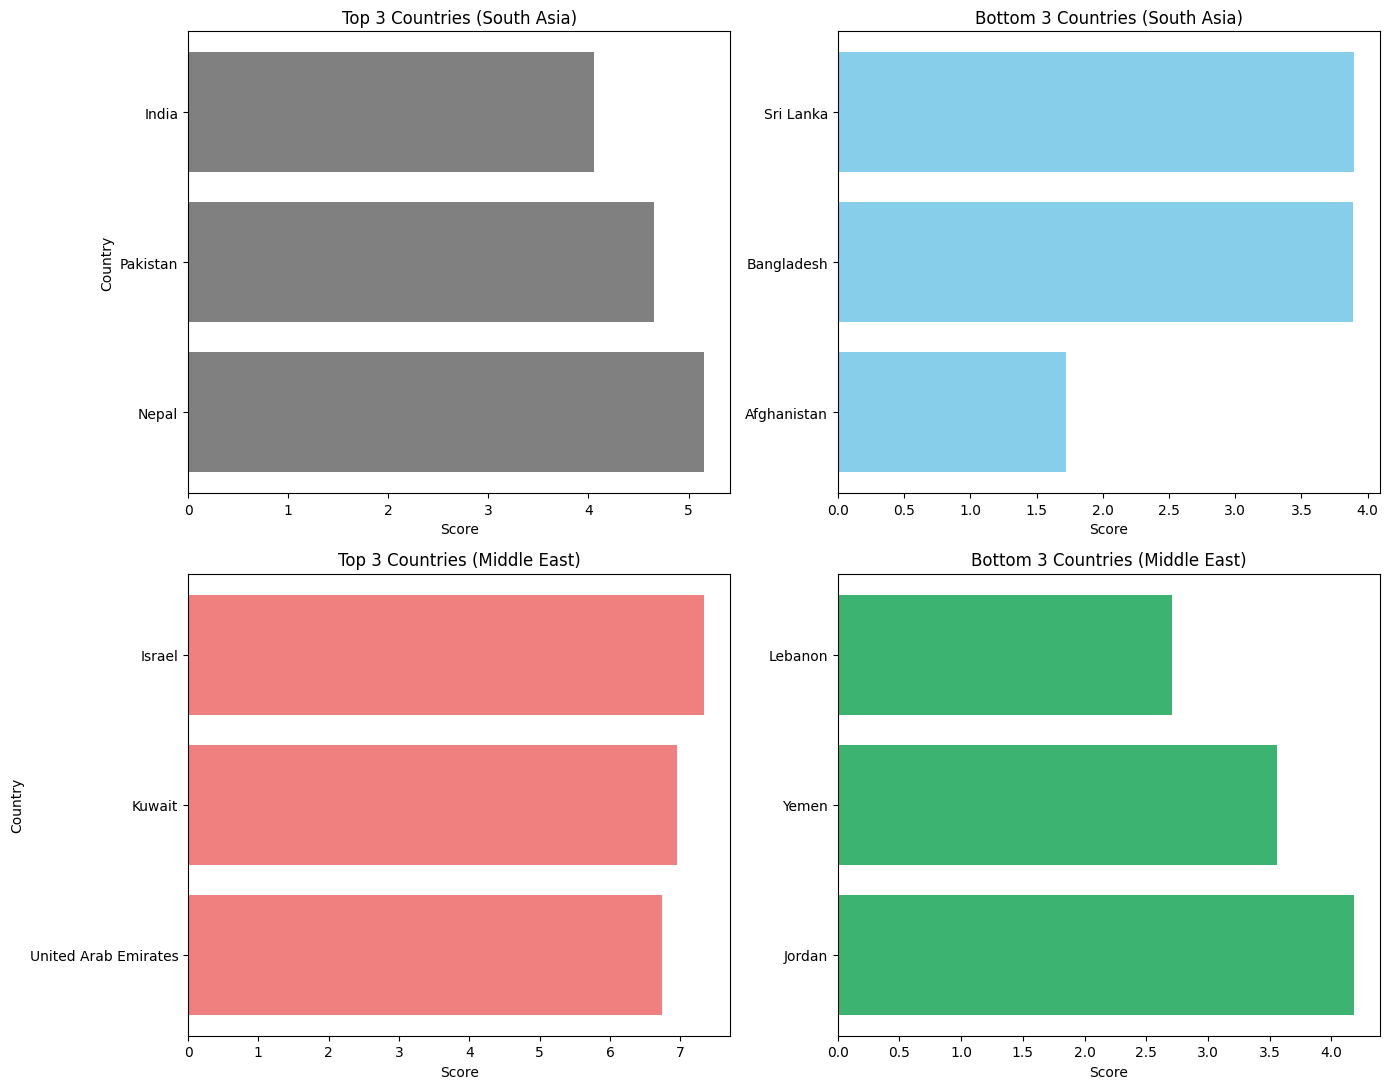

In [27]:
SouthAsia = pd.read_csv('south_asia_dataset.csv')
MiddleEast = pd.read_csv('MiddleEast.csv')
#Top 3 and bottom 3 countries based on the score in South Asia
top_3_south_asia = SouthAsia.nlargest(3, 'score')
bottom_3_south_asia = SouthAsia.nsmallest(3, 'score')

#Top 3 and bottom 3 countries based on the score in Middle East
top_3_middle_east = MiddleEast.nlargest(3, 'score')
bottom_3_middle_east = MiddleEast.nsmallest(3, 'score')

# Plot bar charts comparing these charts.
fig, axes = plt.subplots(2, 2, figsize = (14, 11))

# Top performers in South Asia
axes[0, 0].barh(top_3_south_asia['Country name'], top_3_south_asia['score'], color = 'grey')
axes[0, 0].set_title('Top 3 Countries (South Asia)')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Country')
axes[0, 0].invert_yaxis()

#Bottom performers in South Asia
axes[0, 1].barh(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color = 'skyblue')
axes[0, 1].set_title('Bottom 3 Countries (South Asia)')
axes[0, 1].set_xlabel('Score')
axes[0, 0].invert_yaxis()


#Top performers in the MiddleEast
axes[1, 0].barh(top_3_middle_east['Country name'], top_3_middle_east['score'], color = 'lightcoral')
axes[1, 0].set_title('Top 3 Countries (Middle East)')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Country')
axes[1, 0].invert_yaxis()

#Bottom performers in the MiddleEast
axes[1, 1].barh(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color = 'mediumseagreen')
axes[1, 1].set_title('Bottom 3 Countries (Middle East)')
axes[1, 1].set_xlabel('Score')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


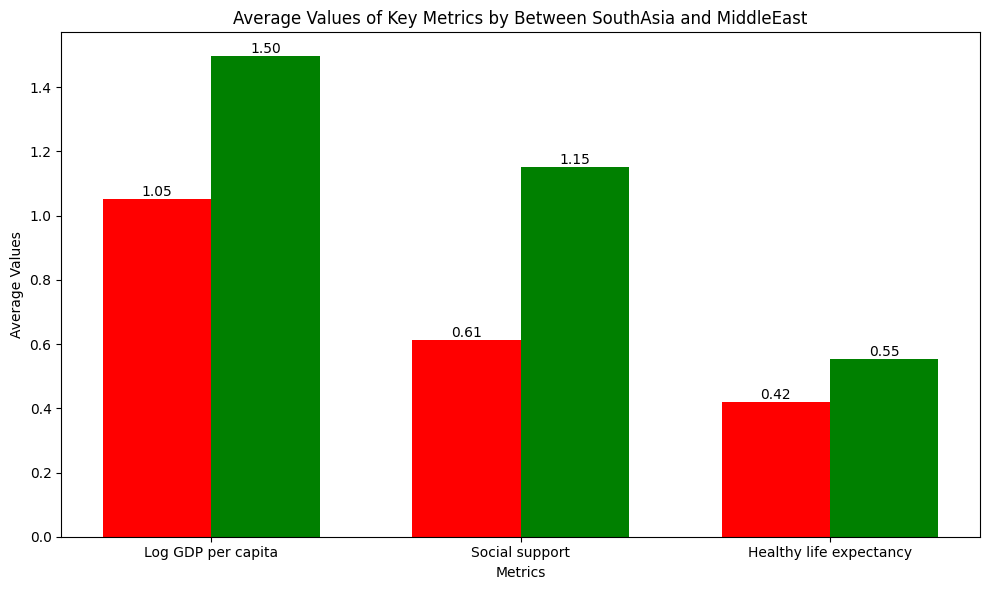

Log GDP per capita shows the largest disparity between Middle East and South Asia.

Social support shows the largest disparity between Middle East and South Asia.

Healthy life expectancy shows the largest disparity between Middle East and South Asia.



In [28]:
SouthAsia = pd.read_csv('south_asia_dataset.csv')
MiddleEast = pd.read_csv('MiddleEast.csv')

#Calcualte average values for key metrices in each region
metrices = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_values_south_asia = SouthAsia[metrices].mean()
mean_values_middle_east = MiddleEast[metrices].mean()

#Group bar chart
x = np.arange(len(metrices))
width = 0.35

fig, ax = plt.subplots(figsize = (10, 6))

#Bars for the SouthAsia and Middle East
bar1 = ax.bar(x - width/2, mean_values_south_asia, width, label = 'South Asia', color ='red')

bar2 = ax.bar(x + width/2, mean_values_middle_east, width, label = 'Middle East', color = 'green')

#Add lables, title and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Average Values of Key Metrics by Between SouthAsia and MiddleEast')
ax.set_xticks(x)
ax.set_xticklabels(metrices)

# Annotate the bars with their values
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

# Compare the average scores for each metric individually
for metric in metrices:
    if mean_values_south_asia[metric] > mean_values_middle_east[metric]:
        print(f"{metric} shows the largest disparity between South Asia and Middle East.\n")
    else:
        print(f"{metric} shows the largest disparity between Middle East and South Asia.\n")


In [29]:
SouthAsia = pd.read_csv("south_asia_dataset.csv")
MiddleEast = pd.read_csv("MiddleEast.csv")

#Compute range (max - min) for each region
range_south_asia = SouthAsia['score'].max() - SouthAsia['score'].min()
range_middle_east = MiddleEast['score'].max() - MiddleEast['score'].min()

#Compute Standard Deviation and Mean for each region
mean_south_asia = SouthAsia['score'].mean()
std_south_asia = SouthAsia['score'].std()

mean_middle_east = MiddleEast['score'].mean()
std_middle_east = MiddleEast['score'].std()

#Compute Coefficient of Variation (CV) for each region
cv_south_asia = (std_south_asia/mean_south_asia) * 100
cv_middle_east = (std_middle_east/mean_middle_east) * 100

#Display result
print("South Asia Happiness Disparity:")
print(f"Range: {range_south_asia}")
print(f"Coefficient of Variation (CV): {cv_south_asia:.2f}%")

print("\nMiddle East Happiness Disparity:")
print(f"Range: {range_middle_east}")
print(f"Coefficient of Variation (CV): {cv_middle_east:.2f}%")

# Determine which region has greater variabililty

if cv_south_asia > cv_middle_east:
    print("\nSouth Asia has greater variability in happiness.")
elif cv_south_asia < cv_middle_east:
    print("\nMiddle East has greater variability in happiness.")


South Asia Happiness Disparity:
Range: 3.4370000000000003
Coefficient of Variation (CV): 30.21%

Middle East Happiness Disparity:
Range: 4.634
Coefficient of Variation (CV): 28.94%

South Asia has greater variability in happiness.


Correlation between Score and Freedom to Make Life Choices in South Asia:0.80
Correlation between Score and Freedom to Make Life Choices in Middle East:0.86

Correlation between Score and Generosity in South Asia:0.87
Correlation between Score and Generosity in Middle East:0.63


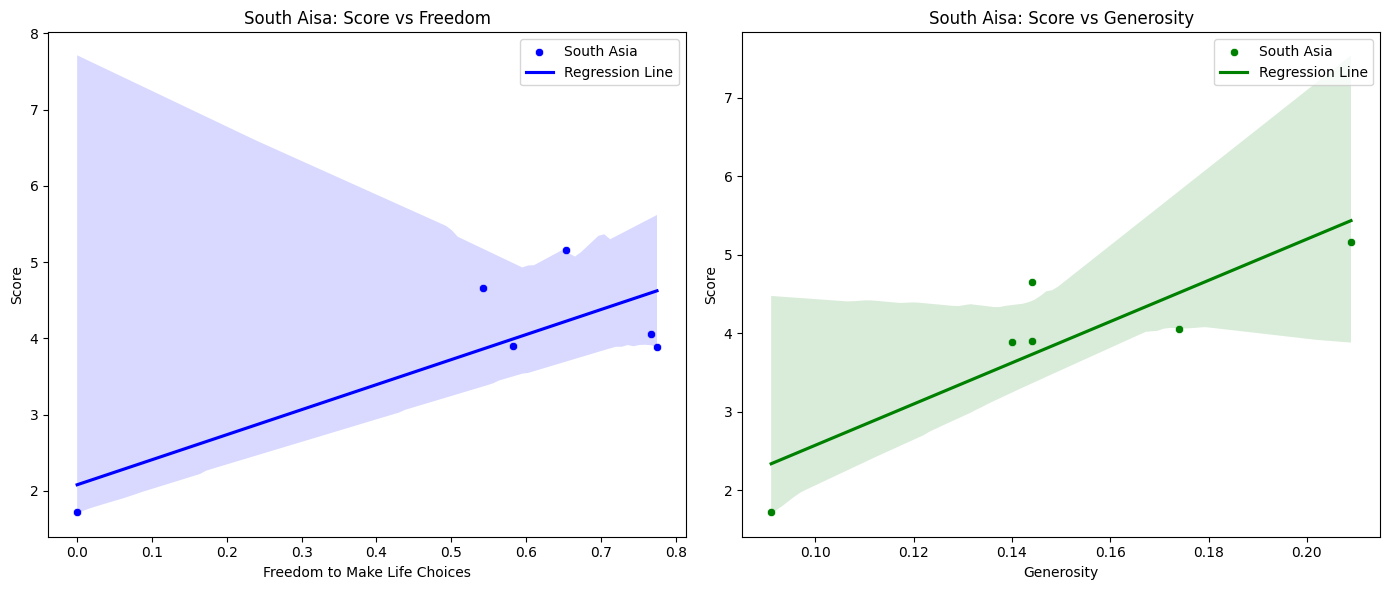

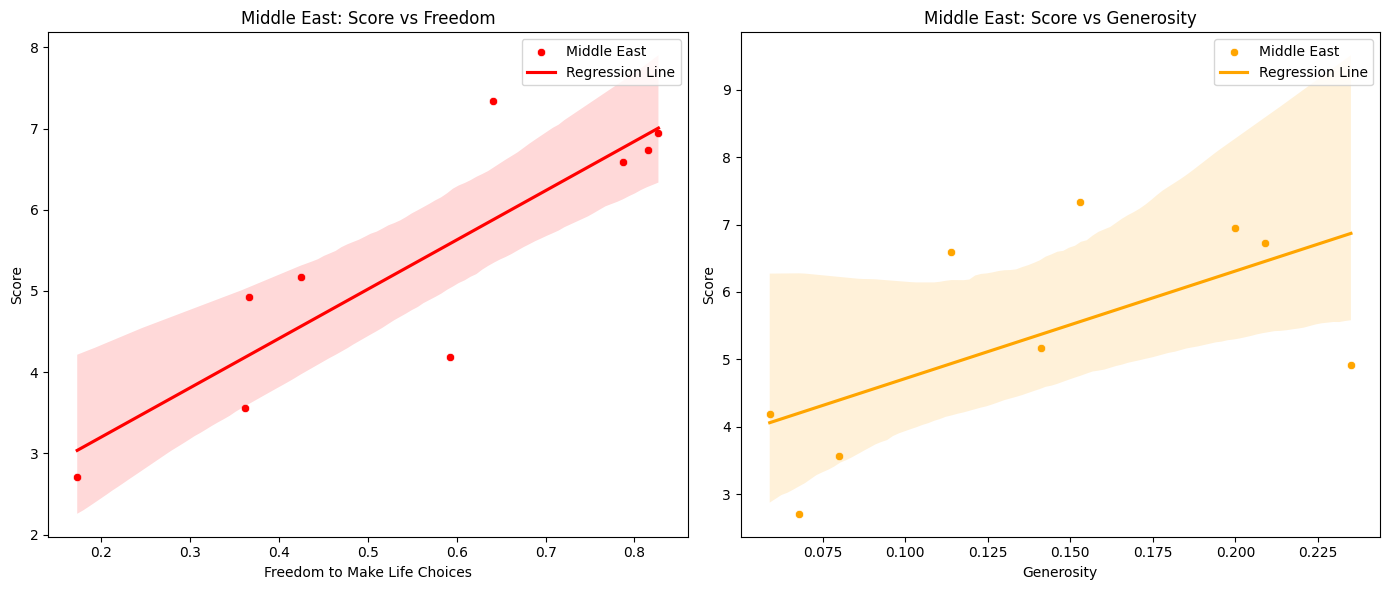

In [30]:
SouthAsia = pd.read_csv("south_asia_dataset.csv")
MiddleEast = pd.read_csv("MiddleEast.csv")
#Correlation of Score with other metrices Freedom to Make Life Choices and Generosity within each region

correlation_south_asia_freedom = SouthAsia['score'].corr(SouthAsia['Freedom to make life choices'])
correlation_middle_east_freedom = MiddleEast['score'].corr(MiddleEast['Freedom to make life choices'])

correlation_south_asia_generosity = SouthAsia['score'].corr(SouthAsia['Generosity'])
correlation_middle_east_generosity = MiddleEast['score'].corr(MiddleEast['Generosity'])


#Display correlation results
print(f"Correlation between Score and Freedom to Make Life Choices in South Asia:{correlation_south_asia_freedom:.2f}")
print(f"Correlation between Score and Freedom to Make Life Choices in Middle East:{correlation_middle_east_freedom:.2f}")

print(f"\nCorrelation between Score and Generosity in South Asia:{correlation_south_asia_generosity:.2f}")
print(f"Correlation between Score and Generosity in Middle East:{correlation_middle_east_generosity:.2f}")

#Scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=SouthAsia, x='Freedom to make life choices', y='score', color='blue', label='South Asia')
sns.regplot(data=SouthAsia, x='Freedom to make life choices', y='score', scatter=False, color='blue', label='Regression Line')
plt.title('South Aisa: Score vs Freedom')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(data=SouthAsia, x='Generosity', y='score', color='green', label='South Asia')
sns.regplot(data=SouthAsia, x='Generosity', y='score', scatter=False, color='green', label='Regression Line')
plt.title('South Aisa: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()


#Scatter plot for middle east
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=MiddleEast, x='Freedom to make life choices', y='score', color='red', label='Middle East')
sns.regplot(data=MiddleEast, x='Freedom to make life choices', y='score', scatter=False, color='red', label='Regression Line')
plt.title('Middle East: Score vs Freedom')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(data=MiddleEast, x='Generosity', y='score', color='orange', label='Middle East')
sns.regplot(data=MiddleEast, x='Generosity', y='score', scatter=False, color='orange', label='Regression Line')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

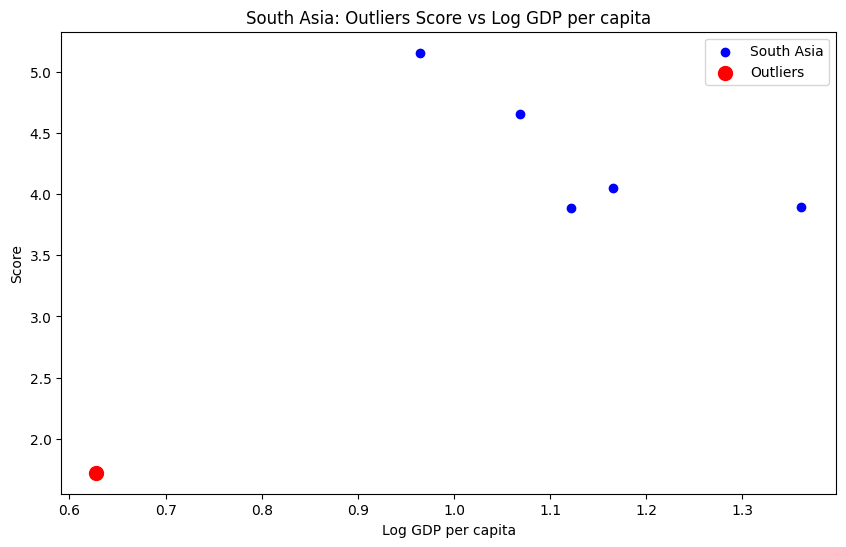

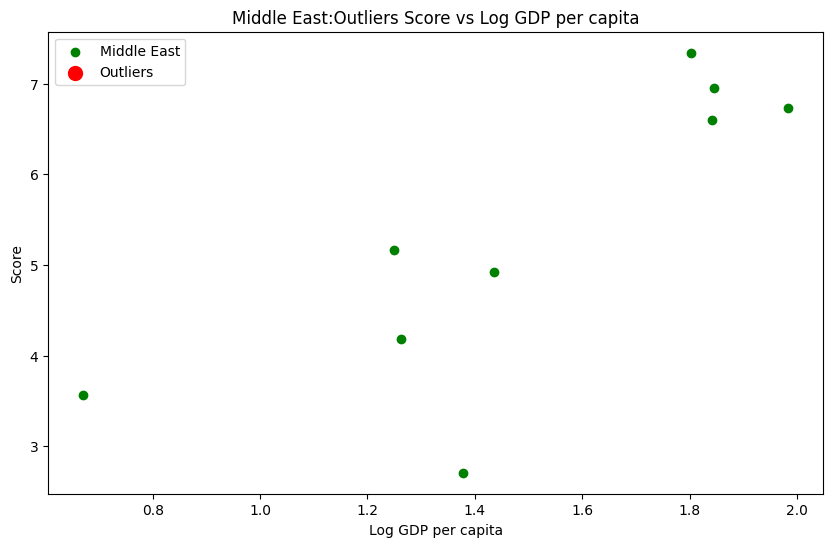

Outliers for South Asia:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Outliers for Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [31]:
SouthAsia = pd.read_csv("south_asia_dataset.csv")
MiddleEast = pd.read_csv("MiddleEast.csv")

#Outliner countries based on Score and GDP per capita
#Function to detect outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Detect outlier for south asia
outliers_south_asia = find_outliers(SouthAsia, 'score')
outliers_south_asia_gdp = find_outliers(SouthAsia, 'Log GDP per capita')

#Detect outlier for middle east
outliers_middle_east = find_outliers(MiddleEast, 'score')
outliers_middle_east_gdp = find_outliers(MiddleEast, 'Log GDP per capita')


#Combine outliers for plotting
south_asia_outliers = pd.concat([outliers_south_asia, outliers_south_asia_gdp]).drop_duplicates()
middle_east_outliers = pd.concat([outliers_middle_east, outliers_middle_east_gdp]).drop_duplicates()

#Scatter plot for South Asia
plt.figure(figsize=(10, 6))
plt.scatter(data = SouthAsia, x='Log GDP per capita', y = 'score', color='blue', label='South Asia')
plt.scatter(data = south_asia_outliers, x = 'Log GDP per capita', y = 'score', color='red', label='Outliers', s = 100)
plt.title('South Asia: Outliers Score vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()

#Scatter plot for the middle east
plt.figure(figsize=(10, 6))
plt.scatter(data = MiddleEast, x='Log GDP per capita', y = 'score', color='green', label='Middle East')
plt.scatter(data = middle_east_outliers, x = 'Log GDP per capita', y = 'score', color='red', label='Outliers', s = 100)
plt.title('Middle East:Outliers Score vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()

#Print outliers for review
print("Outliers for South Asia:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nOutliers for Middle East:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])

<ipython-input-32-0dc813b788ba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = combined_data, x ='Region', y = 'score', palette = 'Set2', width = 0.6)


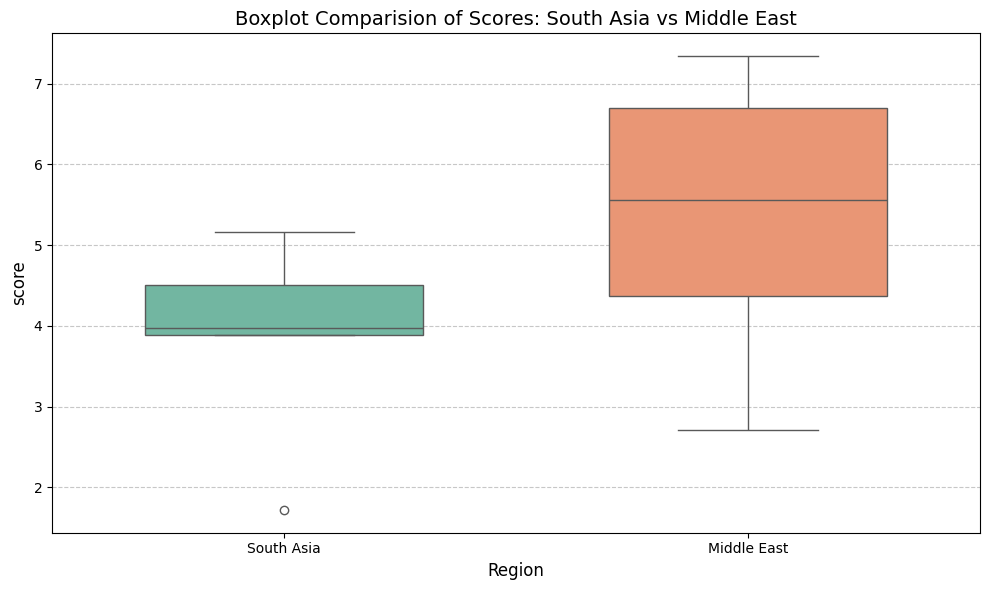

In [32]:
SouthAsia = pd.read_csv("south_asia_dataset.csv")
MiddleEast = pd.read_csv("MiddleEast.csv")

#Combine south asia and middle east data for comparisoin
combined_data = pd.concat([
    SouthAsia[['Country name', 'score']].assign(Region = 'South Asia'),
    MiddleEast[['Country name', 'score']].assign(Region = 'Middle East')
])

#Create bosplots for score comparision
plt.figure(figsize=(10, 6))
sns.boxplot(data = combined_data, x ='Region', y = 'score', palette = 'Set2', width = 0.6)

#Add plot title and labels
plt.title('Boxplot Comparision of Scores: South Asia vs Middle East', fontsize = 14)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('score',  fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

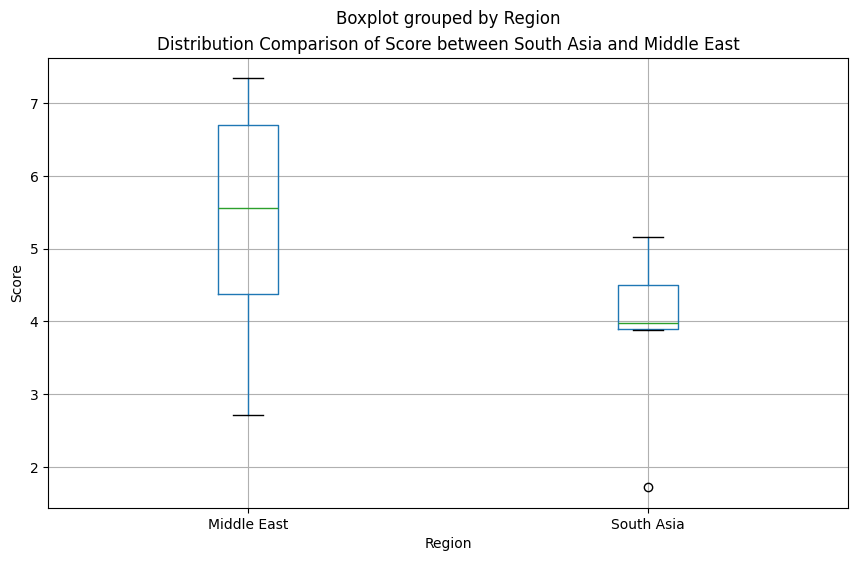

Median Score (South Asia): 3.98
Median Score (Middle East): 5.56
The median score is higher in Middle East.


In [33]:
combined_data.boxplot(column='score', by='Region', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Distribution Comparison of Score between South Asia and Middle East')
plt.show()
median_south_asia = SouthAsia['score'].median()
median_middle_eastern =  MiddleEast['score'].median()
print(f"Median Score (South Asia): {median_south_asia:.2f}")
print(f"Median Score (Middle East): {median_middle_eastern:.2f}")
if median_south_asia > median_middle_eastern:
    print("The median score is higher in South Asia.")
else:
    print("The median score is higher in Middle East.")